In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np # for numerical data
import seaborn as sns # data visualisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split # for spliting Test and Training Data
from sklearn.linear_model import PassiveAggressiveClassifier # used for classification
from sklearn.naive_bayes import MultinomialNB # used in NLP for implementing Naive bayes
from sklearn import metrics
import matplotlib.pyplot as plt # data visualisation
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
import nltk
import sklearn
import bs4 #beatifulsoup4


In [3]:
df=pd.read_csv('drugsComTrain_raw.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'drugsComTrain_raw.csv'

In [ ]:
df.to_csv('drugsComTrain_raw.csv',index=False)

In [ ]:
train = pd.read_csv('drugsComTrain_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')


In [ ]:
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [ ]:
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [ ]:
conditions_of_interest = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorder', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure', 'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding', 'Bowel Preparation', 'Fibromyalgia', 'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Major Depressive Disorder', 'Constipation', 'Panic Disorder', 'Chronic Pain', 'Migraine Prevention', 'Urinary Tract Infection', 'Muscle Spasm', 'Osteoarthritis', 'Generalized Anxiety Disorder', 'Erectile Dysfunction', 'Opiate Dependence', 'Irritable Bowel Syndrome', 'Rheumatoid Arthritis', 'Allergic Rhinitis', 'Bacterial Infection', 'Cough', 'Sinusitis', 'Nausea/Vomiting', 'GERD', 'Multiple Sclerosis', 'Overactive Bladder', 'Hyperhidrosis', 'Hepatitis C', 'Back Pain', 'HIV Infection', 'High Cholesterol', 'Psoriasis', 'Schizophrenia', 'Constipation, Chronic', 'Obsessive Compulsive Disorder', 'Restless Legs Syndrome', 'Benign Prostatic Hyperplasia', 'Endometriosis', 'Bronchitis', 'Bacterial Vaginitis', 'Rosacea', 'Seizures', 'Narcolepsy', 'Hypogonadism, Male', 'Asthma, Maintenance', 'Headache', 'Underactive Thyroid', 'Not Listed / Other', 'Schizoaffective Disorder', 'Onychomycosis, Toenail', 'Bladder Infection', 'Social Anxiety Disorder', 'Alcohol Dependence', 'Herpes Simplex', 'Osteoporosis', 'Cold Sores', 'Epilepsy', 'Cough and Nasal Congestion', 'Menstrual Disorders', 'Influenza', 'Plaque Psoriasis', 'Opiate Withdrawal', 'Psoriatic Arthritis', 'Post Traumatic Stress Disorder', 'Postmenopausal Symptoms', 'Polycystic Ovary Syndrome', 'Inflammatory Conditions', 'Premenstrual Dysphoric Disorder', 'Nasal Congestion', 'Pneumonia', 'Chlamydia Infection', 'Atrial Fibrillation', 'Breast Cancer', 'Urticaria', 'Helicobacter Pylori Infection', 'Hot Flashes', 'Neuropathic Pain', 'Anesthesia', 'COPD, Maintenance', 'Ulcerative Colitis', 'Constipation, Drug Induced', 'Skin or Soft Tissue Infection', 'Asthma', 'Alcohol Withdrawal', 'Ankylosing Spondylitis', 'Motion Sickness', 'Gout, Acute', 'Crohn\'s Disease, Maintenance', 'Performance Anxiety', 'Seizure Prevention', 'Atrophic Vaginitis', 'Allergies', 'Interstitial Cystitis', 'Peripheral Neuropathy', 'Diabetic Peripheral Neuropathy', 'Hashimoto\'s Disease', 'Upper Respiratory Tract Infection', 'Crohn\'s Disease', 'Urinary Incontinence', 'Herpes Simplex, Suppression', 'Cluster Headaches', 'Eczema', 'Sedation', 'Atopic Dermatitis', 'Trigeminal Neuralgia', 'Prevention of Thromboembolism in Atrial Fibrillation', 'COPD', 'Ovarian Cysts', 'Otitis Media', 'Hypothyroidism, After Thyroid Removal', 'Borderline Personality Disorder', 'Dry Eye Disease', 'Bacterial Skin Infection', 'Diverticulitis', 'Diabetes, Type 1', 'Period Pain', 'Asthma, Acute', 'Ulcerative Colitis, Active', 'Sciatica', 'Prostate Cancer', 'Nausea/Vomiting of Pregnancy', 'Parkinson\'s Disease', 'Kidney Infections', 'Cold Symptoms', 'Diarrhea', 'Strep Throat', 'Tonsillitis/Pharyngitis', 'Keratosis', 'Gout', 'Breast Cancer, Metastatic', 'Dietary Supplementation', 'Human Papilloma Virus', 'Vertigo', 'Urinary Tract Stones']

df_train = df[df['condition'].isin(conditions_of_interest)]


In [ ]:
df.shape

(161297, 7)

In [ ]:
df_train.shape

(133829, 7)

In [ ]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

## **DATA VISUALIZATION**


In [ ]:
data = pd.concat([train, test])

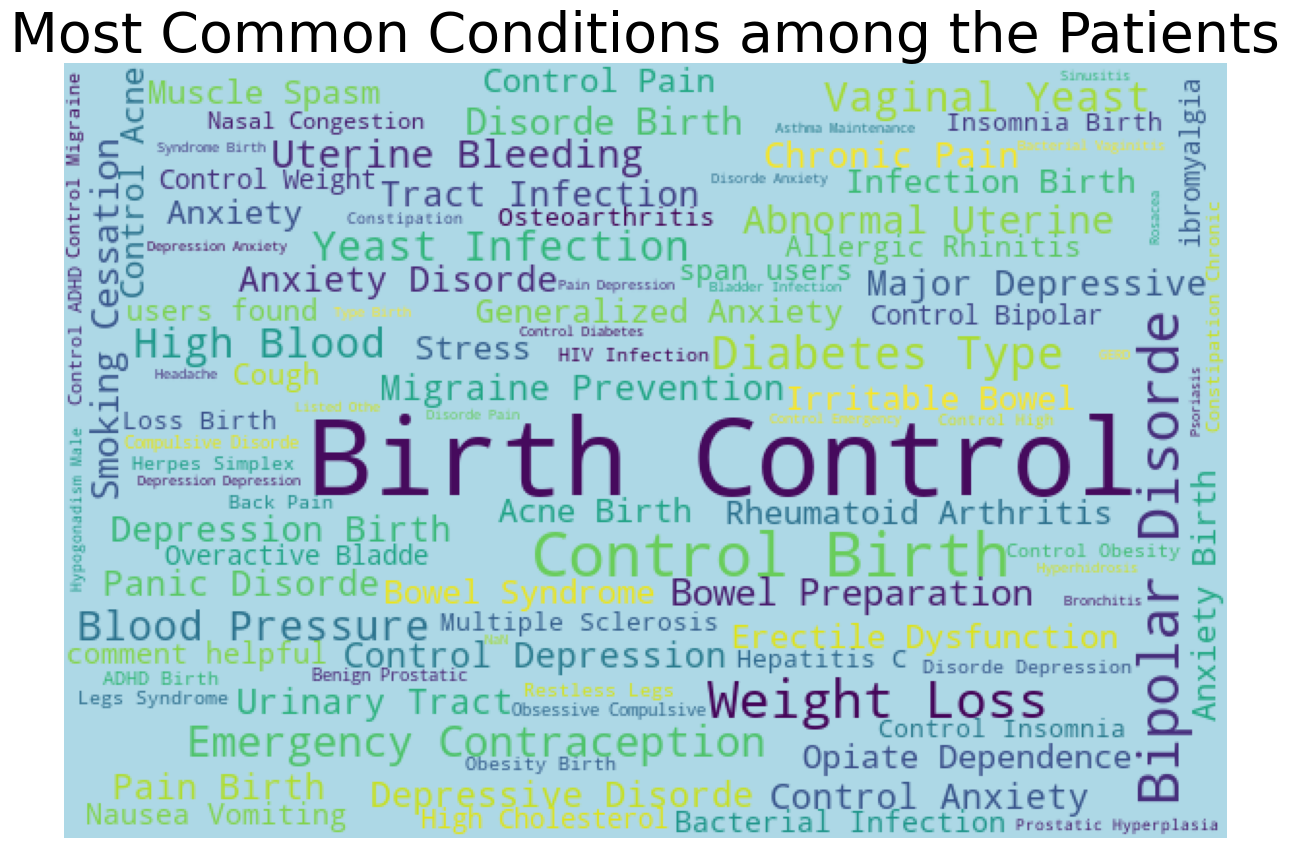

In [ ]:
# most common condition

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)


wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 600, height = 400).generate(str(data['condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 40)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

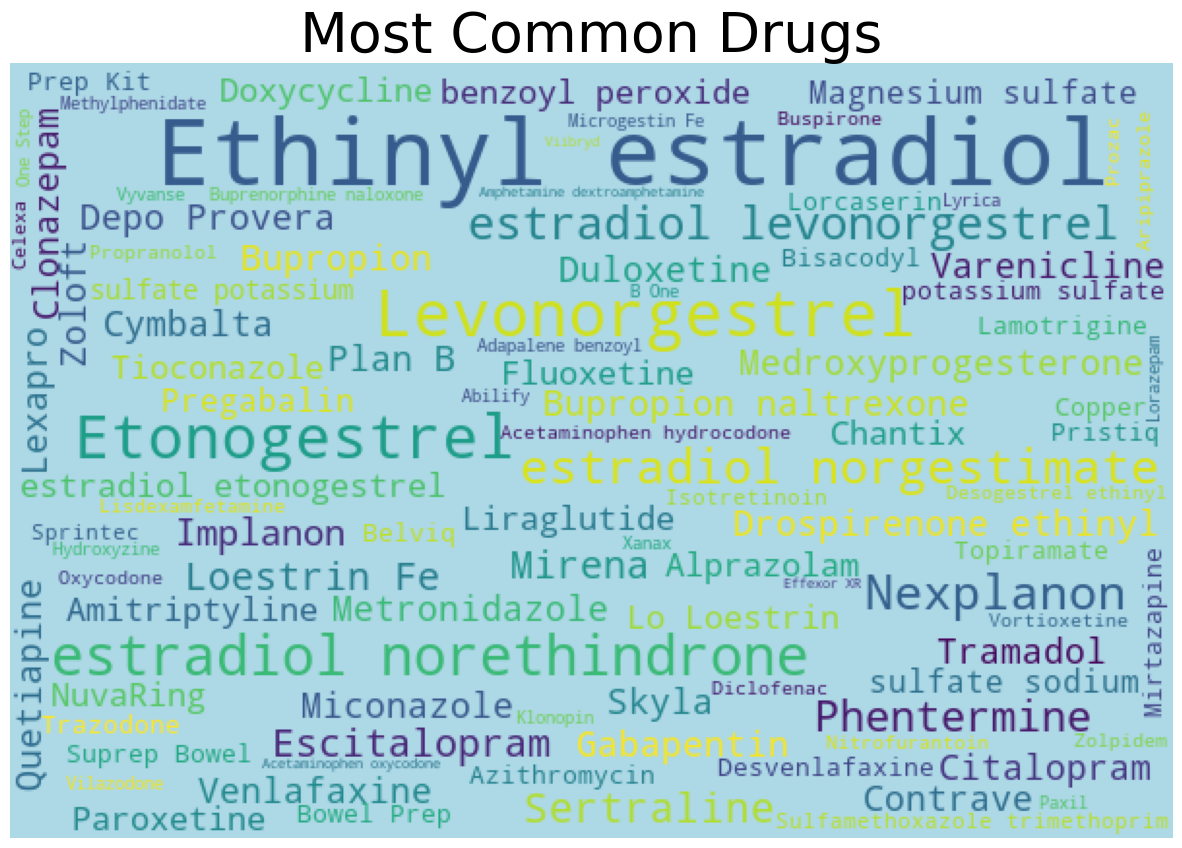

In [ ]:
# most common drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 600, height = 400).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Drugs', fontsize = 40)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

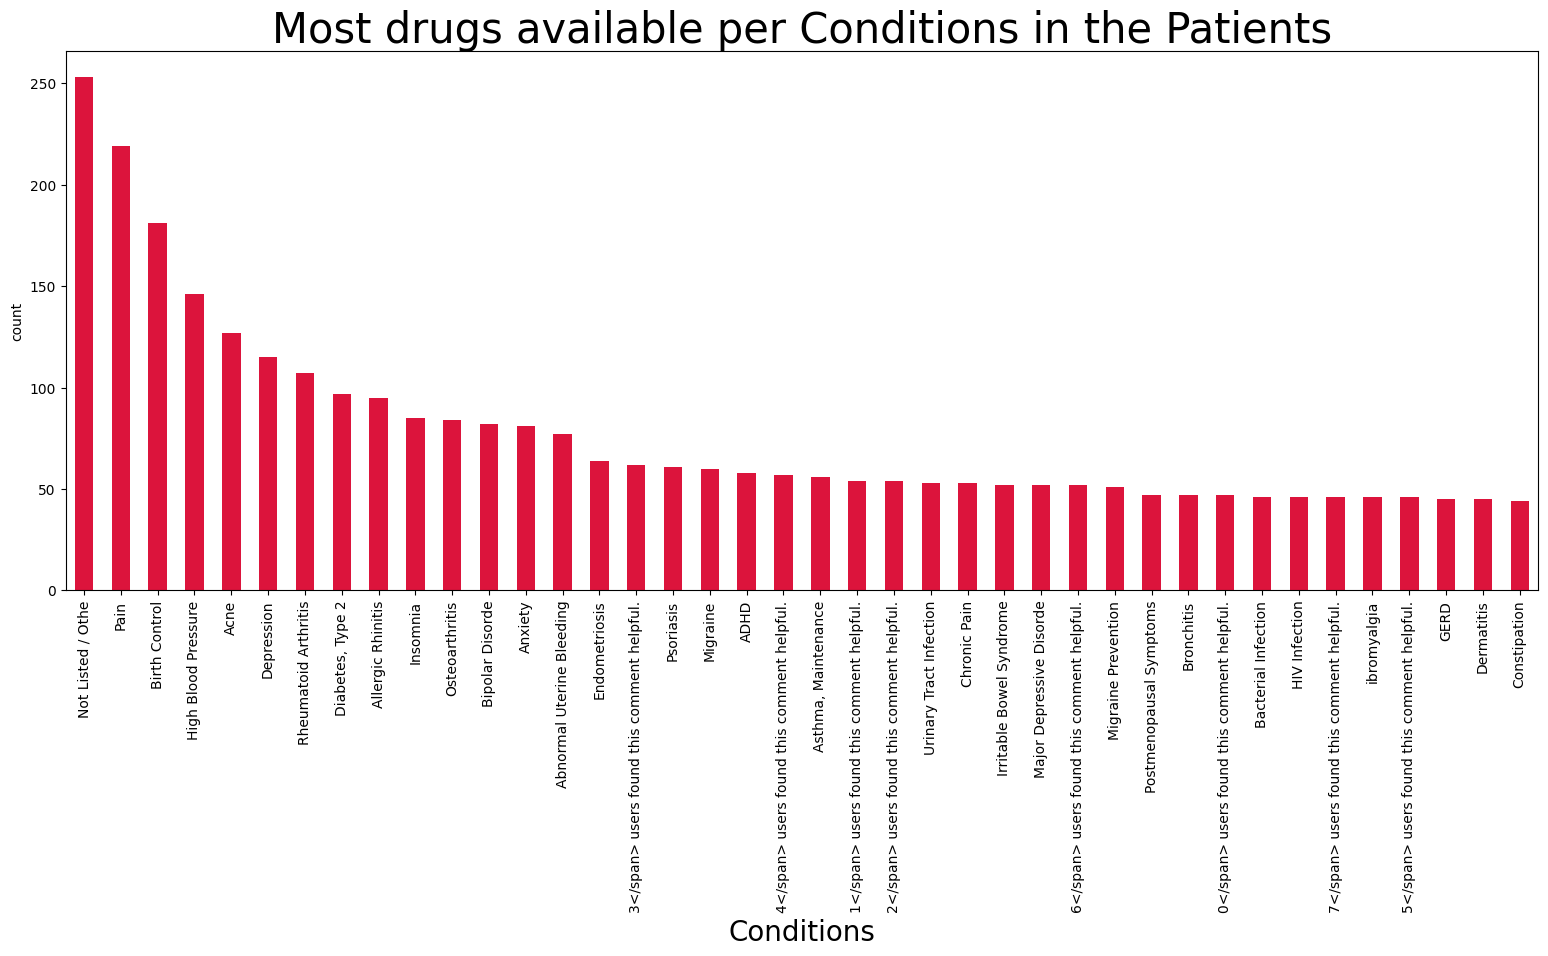

In [ ]:
# checking the most popular drugs per conditions

data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

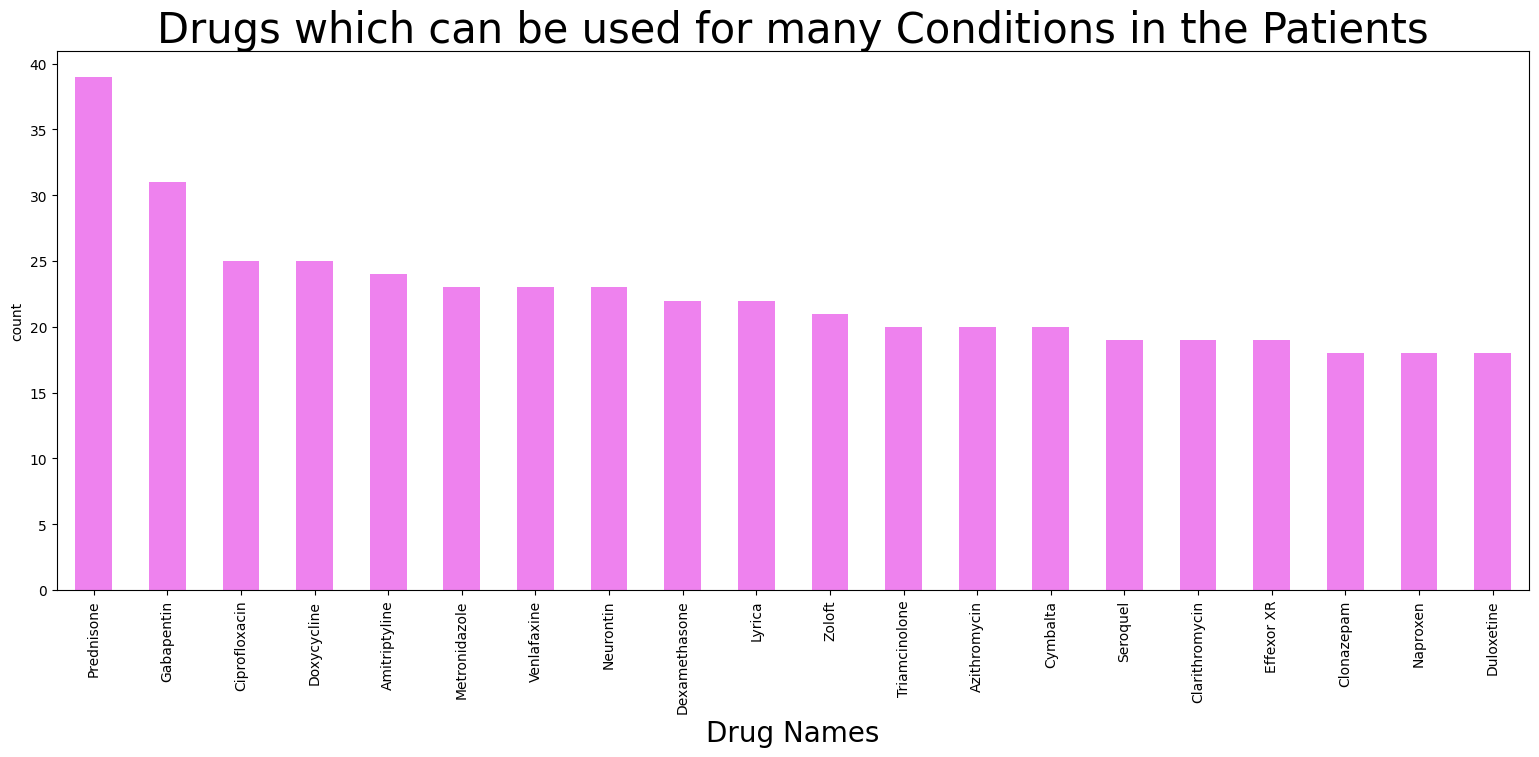

In [ ]:
# checking the most popular drugs per conditions

data.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(20).plot.bar(figsize = (19, 7), color = 'violet')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()

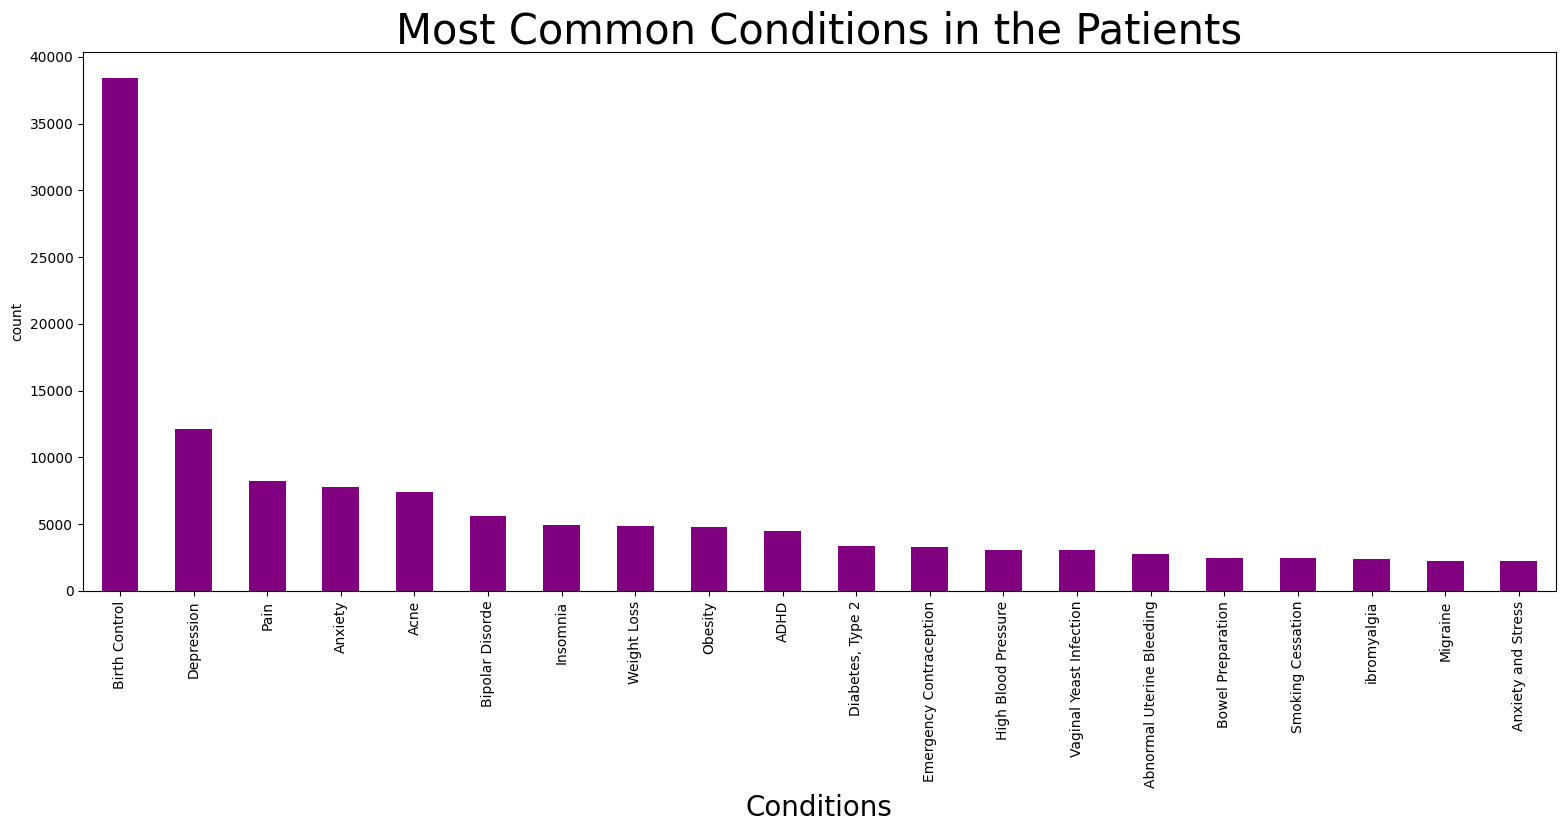

In [ ]:
# checking the different types of conditions patients


data['condition'].value_counts().head(20).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

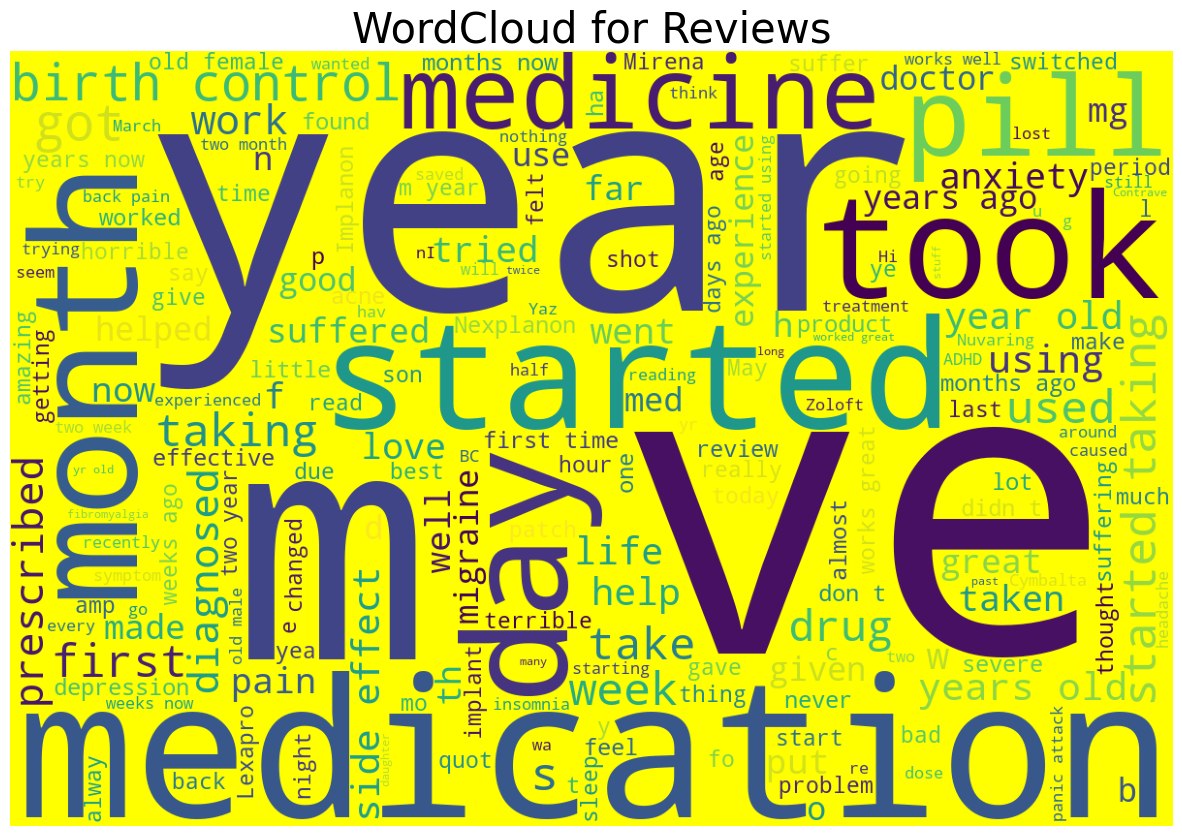

In [ ]:
# let's see the words cloud for the reviews


from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WordCloud for Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
#lets represent the review rating

data['rating'].value_counts()



10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

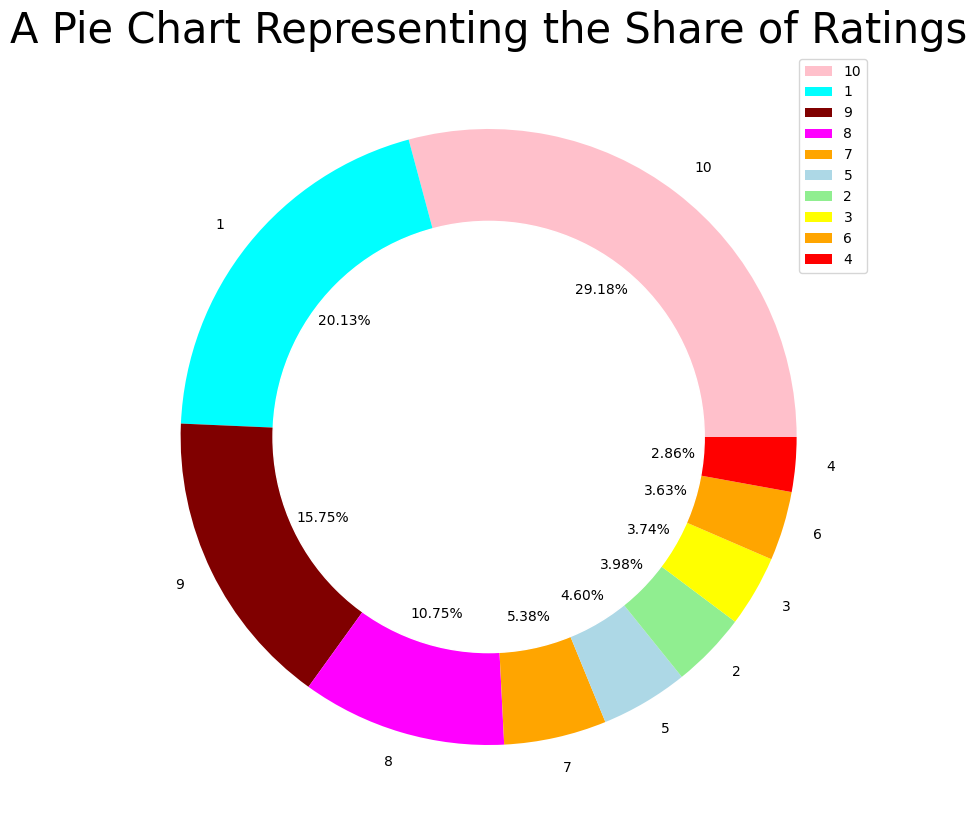

In [ ]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 9265, 8718, 8462, 6671,]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow','orange','red']
labels = "10", "1", "9", "8", "7", "5", "2", "3", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
# feature engineering
# let's make a new column review sentiment

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review_Sentiment, dtype: int64

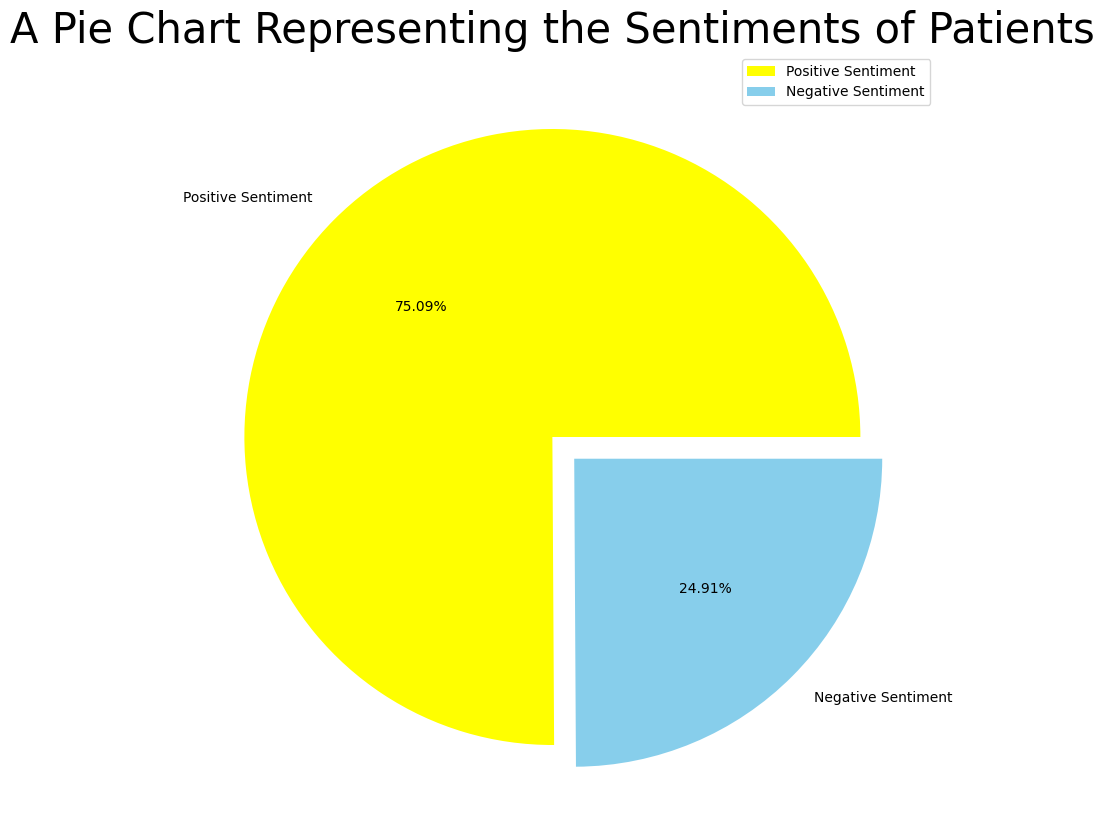

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

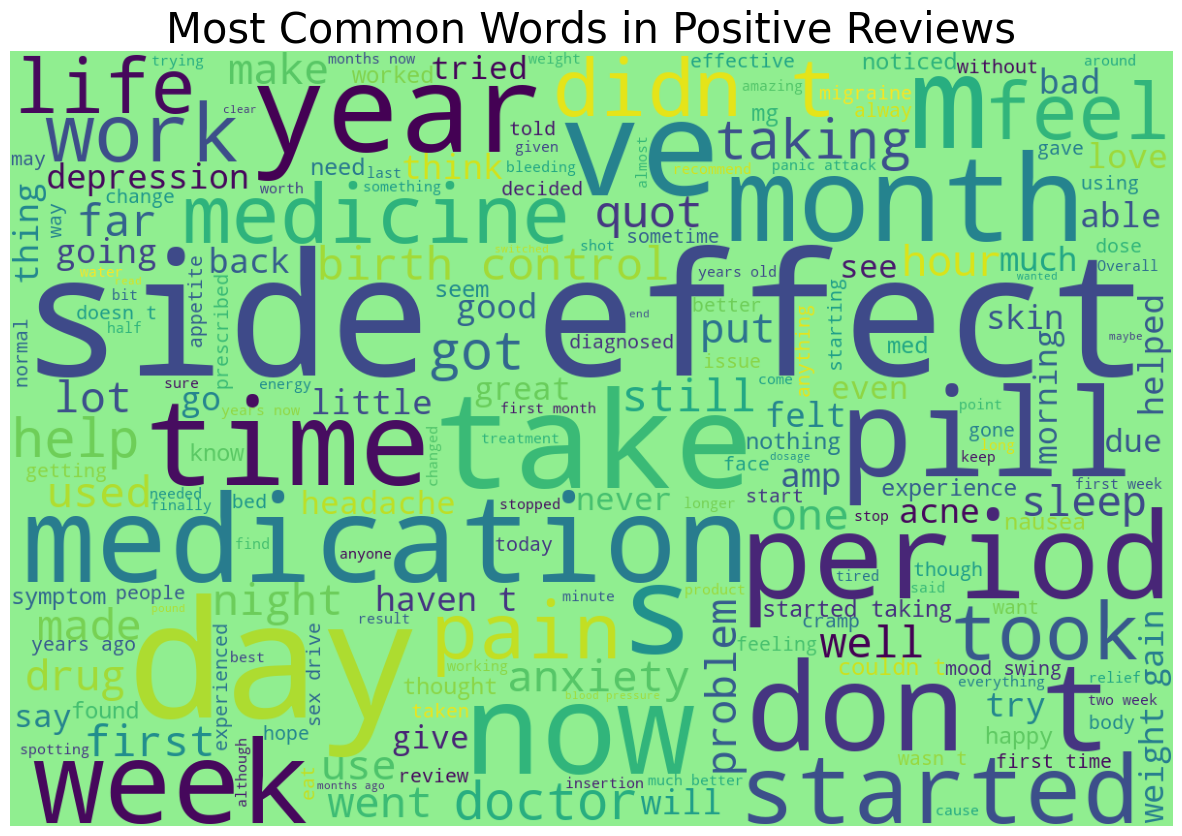

In [ ]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

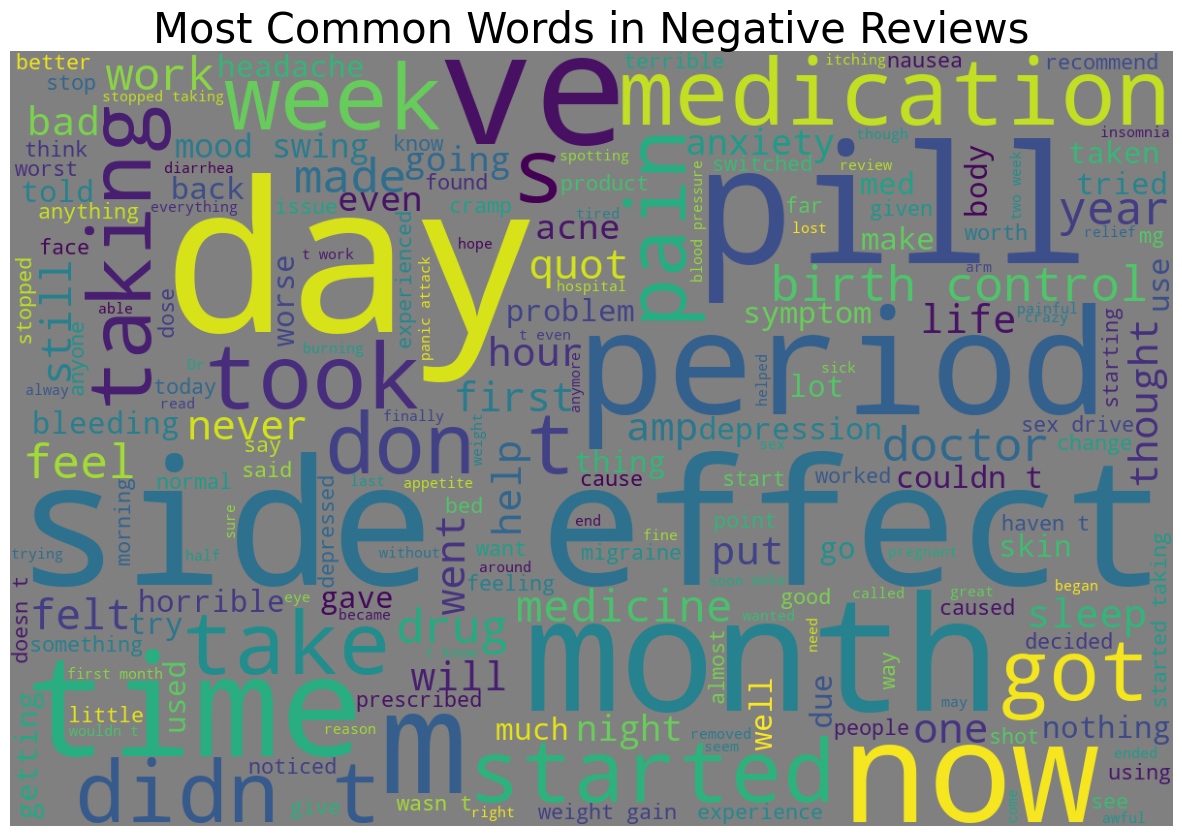

In [ ]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## **EDA**

In [ ]:
X.condition.value_counts()

Birth Control                                           28788
Depression                                               9069
Pain                                                     6145
Anxiety                                                  5904
Acne                                                     5588
Insomnia                                                 3673
Weight Loss                                              3609
Obesity                                                  3568
ADHD                                                     3383
Diabetes, Type 2                                         2554
Emergency Contraception                                  2463
High Blood Pressure                                      2321
Vaginal Yeast Infection                                  2274
Abnormal Uterine Bleeding                                2096
Bowel Preparation                                        1859
Smoking Cessation                                        1780
Migraine

In [ ]:
X.head()

condition  \
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   
5  Benign Prostatic Hyperplasia   

                                              review  
1  "My son is halfway through his fourth week of ...  
2  "I used to take another oral contraceptive, wh...  
3  "This is my first time using any form of birth...  
4  "Suboxone has completely turned my life around...  
5  "2nd day on 5mg started to work with rock hard...

In [ ]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

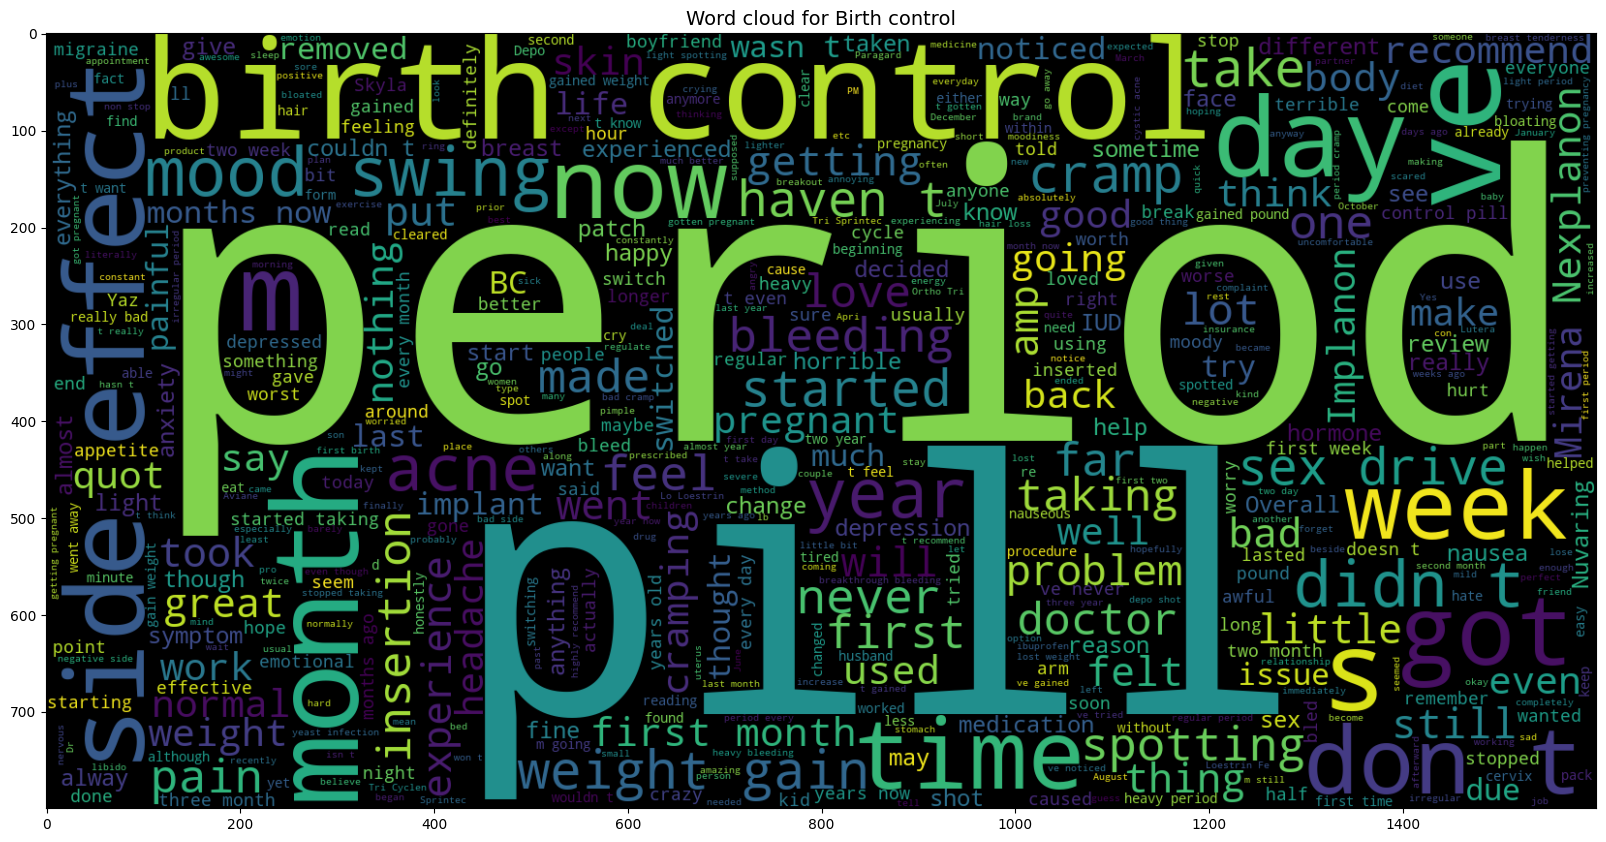

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

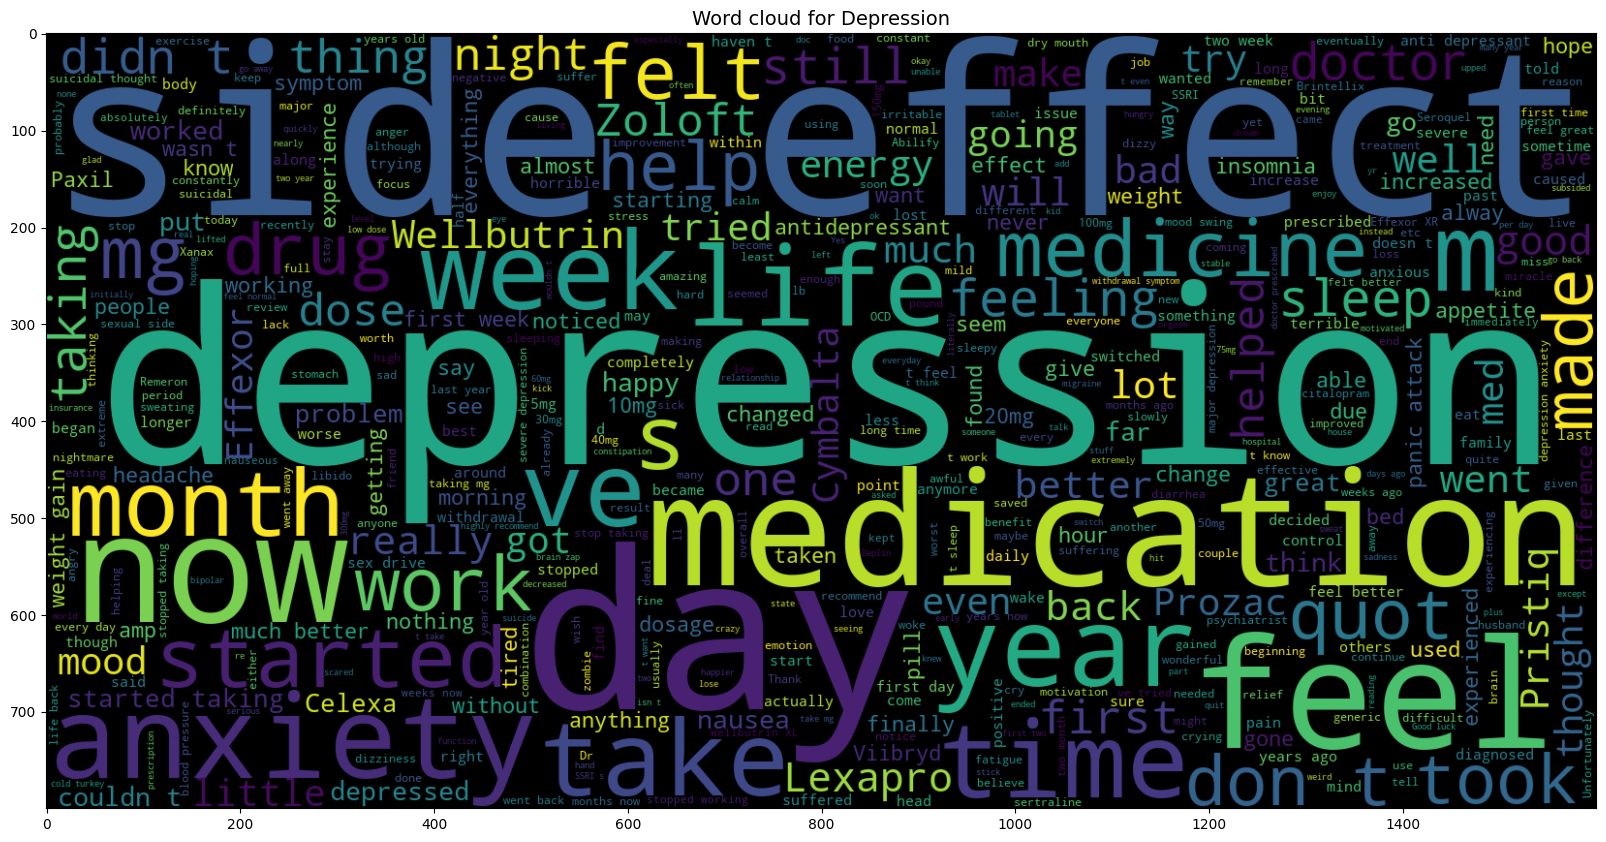

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

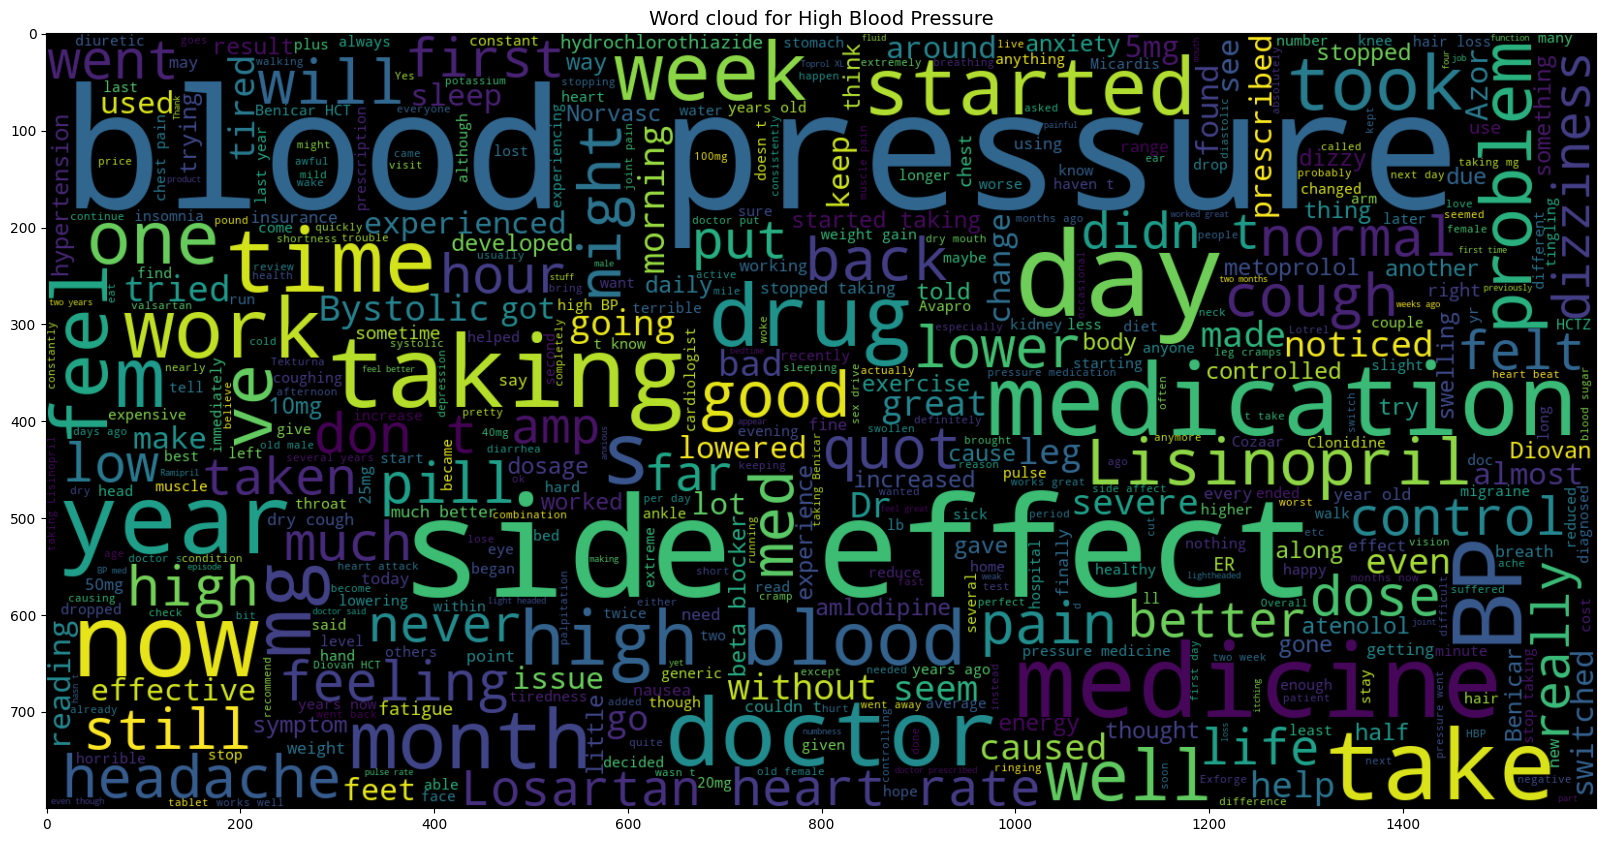

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

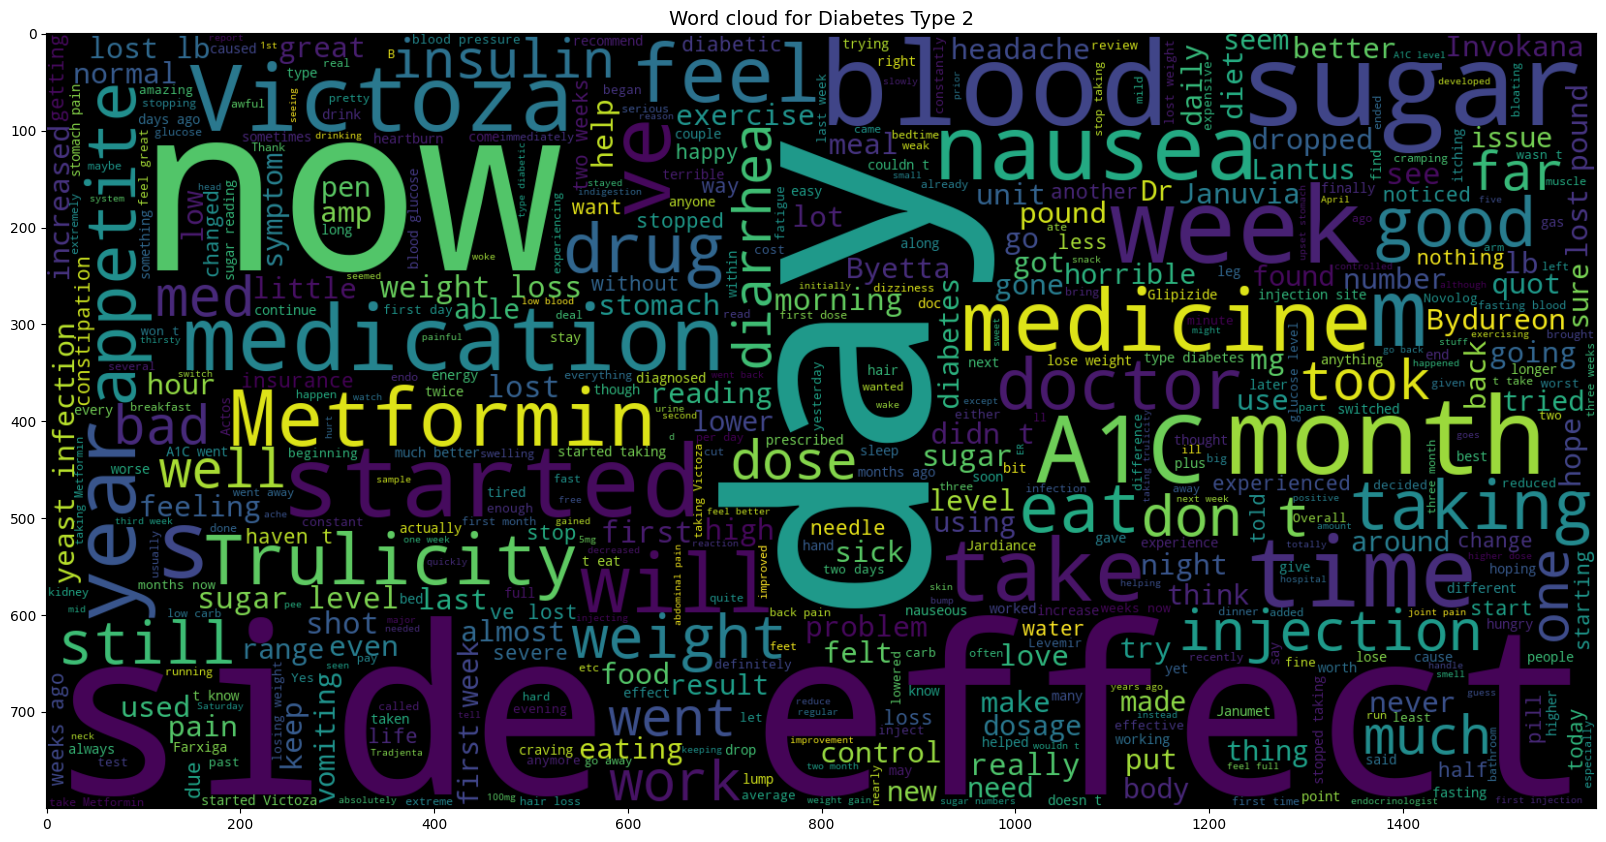

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

In [ ]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\Bhargav Ayare\AppData\Local\Temp\ipykernel_16720\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


## **Stopword Removal**

In [ ]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords

stop = stopwords.words('english')



[nltk_data] Downloading package stopwords to C:\Users\Bhargav
[nltk_data]     Ayare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Bhargav
[nltk_data]     Ayare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


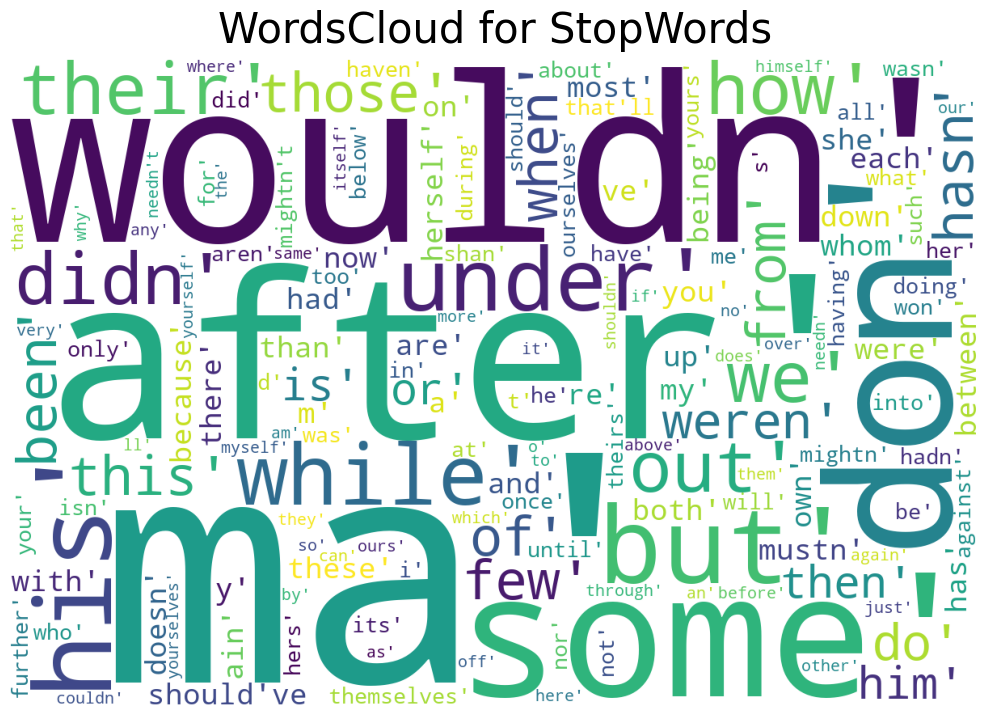

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stops = set(stopwords.words('english'))
def plot_wordcloud(text, max_words = 200, figure_size=(10, 10), title = None, title_size = 30, image_color = None):

    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    random_state = 42,
                    width = 1200,
                    height = 800,)
    wordcloud.generate(str(text))

    plt.figure(figsize = figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(stops, title="WordsCloud for StopWords")

# **Lemmitization**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [ ]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [ ]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("dogs"))
print(lemmatizer.lemmatize("churches"))
print(lemmatizer.lemmatize("books"))


[nltk_data] Downloading package wordnet to C:\Users\Bhargav
[nltk_data]     Ayare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


dog
church
book


In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\Bhargav Ayare\AppData\Local\Temp\ipykernel_16720\4279475652.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
X.head()

condition  \
1  ADHD                           
2  Birth Control                  
3  Birth Control                  
4  Opiate Dependence              
5  Benign Prostatic Hyperplasia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."                 
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"                                                                                                                                                                                                                                                                                                                        
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."                                 